In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
#     font_list_mac = fm.OSXInstalledFonts()
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Linux': # 리눅스
    rc( 'font', family='NanumGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    # fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family='NanumGothic' )
else:
    print('알수없는 시스템. 미적용')

In [16]:
lib_use = pd.read_csv('./data/공공도서관_이용률__2013.csv', encoding='euc-kr', skiprows=1)
print(lib_use.isnull().sum())
print(lib_use.shape)
print("="*50)

lib_use = pd.read_csv('./data/공공도서관_이용률__2015.csv', encoding='euc-kr', skiprows=1)
print(lib_use.isnull().sum())
print(lib_use.shape)
print("="*50)

lib_use = pd.read_csv('./data/공공도서관_이용률__2017.csv', encoding='euc-kr', skiprows=1)
print(lib_use.isnull().sum())
print(lib_use.shape)
print("="*50)

# 칼럼 다 똑같다. / 결측치 없다.
# 연도만 생성해서 바로 concat!!

통계분류(1)      0
통계분류(2)      0
사례수          0
이용한 적이 있다    0
이용한 적이 없다    0
dtype: int64
(17, 5)
통계분류(1)      0
통계분류(2)      0
사례수          0
이용한 적이 있다    0
이용한 적이 없다    0
dtype: int64
(17, 5)
통계분류(1)      0
통계분류(2)      0
사례수          0
이용한 적이 있다    0
이용한 적이 없다    0
dtype: int64
(17, 5)


In [14]:
li = [2013, 2015, 2017]
df_li = list()

for year in li:
    file_path = './data/공공도서관_이용률__{0}.csv'.format(year)
    lib_use = pd.read_csv(file_path, encoding='euc-kr', skiprows=1)
    
    # 칼럼명 변경
    dic = {
        "통계분류(1)":"대분류",
        "통계분류(2)":"소분류",
    }
    lib_use.rename( columns=dic, inplace=True )
    
    # 연도 칼럼 추가
    li = [year for i in range(0, lib_use.shape[0])]
    lib_use['연도'] = li
    
    df_li.append(lib_use)

lib_use_all = pd.concat([df_li[0], df_li[1], df_li[2]], ignore_index=True)
lib_use_all.to_csv('./output/lib_use_2013_2017.csv', encoding='euc-kr', index=False)

In [19]:
lib_use_all.head(17)

,대분류,소분류,사례수,이용한 적이 있다,이용한 적이 없다,연도
0,전체,소계,2000,30.3,69.7,2013
1,성별,남자,993,28.3,71.7,2013
2,성별,여자,1007,32.4,67.6,2013
3,연령,18~29세,387,51.9,48.1,2013
4,연령,30~39세,389,40.5,59.5,2013
5,연령,40~49세,425,34.1,65.9,2013
6,연령,50~59세,385,16.9,83.1,2013
7,연령,60세 이상,414,9.2,90.8,2013
8,학력,중졸 이하,286,2.0,98.0,2013
9,학력,고졸 고퇴,748,20.6,79.4,2013


In [22]:
lib_use_all.dtypes

대분류           object
소분류           object
사례수            int64
이용한 적이 있다    float64
이용한 적이 없다    float64
연도             int64
dtype: object

In [38]:
read_per = lib_use_all[lib_use_all.대분류 == "연간 독서량"]
read_per = read_per[read_per.연도 == 2013].reset_index(drop=True)
read_per

,대분류,소분류,사례수,이용한 적이 있다,이용한 적이 없다,연도
0,연간 독서량,없음,573,3.4,96.6,2013
1,연간 독서량,1~5권,458,22.0,78.0,2013
2,연간 독서량,6~10권,531,40.6,59.4,2013
3,연간 독서량,11~15권,180,60.4,39.6,2013
4,연간 독서량,16~20권,73,62.2,37.8,2013
5,연간 독서량,21권 이상,186,63.0,37.0,2013


In [65]:
big_one = read_per.사례수.values

small_one = list()
for i in read_per.index:
    tmp = read_per.loc[i]
    small_one.append(tmp["이용한 적이 있다"])
    small_one.append(tmp["이용한 적이 없다"])

# smal_one이 비율이니까, big_one을 그만큼 바꿔줘서 세이브
for i in range(len(big_one)):
    idx_1 = 2*i
    idx_2 = idx_1+1
    small_one[idx_1] = big_one[i]*small_one[idx_1]/100
    small_one[idx_2] = big_one[i]*small_one[idx_2]/100

In [66]:
print(big_one)
print(small_one)

[573 458 531 180  73 186]
[19.482, 553.5179999999999, 100.76, 357.24, 215.586, 315.414, 108.72, 71.28, 45.406000000000006, 27.593999999999998, 117.18, 68.82]


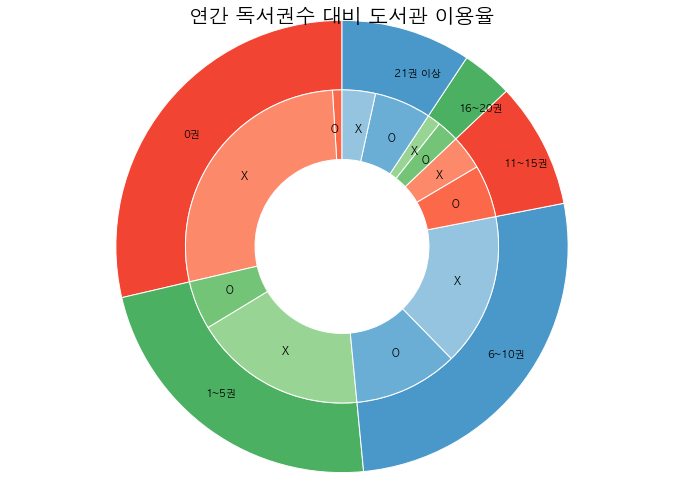

In [83]:
plt.rcParams['figure.figsize'] = [12, 8]



# info. of groups
group_names = ['0권', '1~5권', '6~10권', '11~15권', '16~20권', '21권 이상']
group_data = big_one

# info. of subgroups
subgroup_names = ['O', 'X', 'O', 'X', 'O', 'X', 'O', 'X', 'O', 'X', 'O', 'X']
# subgroup_names = ['사용', '미사용', '사용', '미사용', '사용', '미사용', '사용', '미사용', '사용', '미사용', '사용', '미사용']
subgroup_data = small_one
# colors
a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
# width
width_num = 0.4

# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_data, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.8,
                        colors=[a(0.6), b(0.6), c(0.6), a(0.6), b(0.6), c(0.6)], 
                        startangle=90,)

plt.setp(pie_outside, 
         width=width_num, 
         edgecolor='white')

# Inside Ring
pie_inside, plt_labels = \
    ax.pie(subgroup_data, 
           radius=(1.3 - width_num), 
           labels=subgroup_names, 
           labeldistance=0.75,
           colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4),
                   a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4)],
           startangle=90,)

plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')
plt.title('연간 독서권수 대비 도서관 이용율', fontsize=20)
plt.show()


In [85]:
lib_use_all[lib_use_all.소분류 == "소계"]

,대분류,소분류,사례수,이용한 적이 있다,이용한 적이 없다,연도
0,전체,소계,2000,30.3,69.7,2013
17,전체,소계,5000,28.2,71.8,2015
34,전체,소계,6000,22.2,77.8,2017


In [ ]:
# Dodged Bar Chart (with same X coordinates side by side)
plt.rcParams['figure.figsize'] = [15, 6]

label = ['독후활동', '독서캠페인', '독서교육']
index = np.arange(len(label))

bar_width = 0.25
alpha = 0.5

data = book_pro_all[book_pro_all.소분류 == '소계'].loc[:, ['독후활동', '독서캠페인', '독서교육']].reset_index(drop=True)

d2013 = data.loc[2].values
d2015 = data.loc[1].values
d2017 = data.loc[0].values

p1 = plt.bar(index, d2013, 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='2013')

plt.title('독서 프로그램 참여도 (%)', fontsize=20)
plt.ylabel('참여도', fontsize=18)
plt.xlabel('프로그램별', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0], p3[0]), ('2013', '2015', '2017'), fontsize=15)
plt.show()


In [90]:
lib_use_all.head(2)
lib_use_all[lib_use_all.소분류 == "소계"]["이용한 적이 있다"].values

array([30.3, 28.2, 22.2])

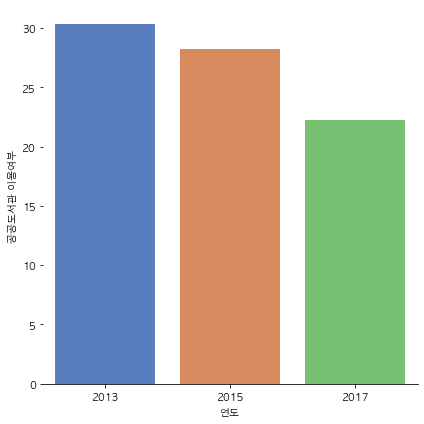

In [93]:
a = lib_use_all[lib_use_all.소분류 == "소계"]

g = sns.catplot(x="연도",y="이용한 적이 있다",data=a,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("공공도서관 이용여부")